In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


file_path = f'/content/drive/MyDrive/Datasets/Churn_Modelling.csv'

df = pd.read_csv(file_path)

In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts()
# 2k people have left and 8k are remaining

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
X_train.shape

(7500, 11)

In [19]:
X_test.shape

(2500, 11)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.73550706,  0.01526571,  0.00886037, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [ 1.02442719, -0.65260917,  0.00886037, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.80829492, -0.46178778,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ..., -0.56811207,
        -0.57468161,  0.91974271],
       [-0.62229491, -0.08014499,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       [-0.28265848,  0.87396199, -1.37557264, ...,  1.76021608,
        -0.57468161, -1.08726059]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
model = Sequential()

model.add(Dense(11,activation='leaky_relu',input_dim=11))
model.add(Dense(11,activation='leaky_relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [26]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [27]:
history = model.fit(X_train_scaled,y_train,epochs=1000,batch_size=100,validation_split=0.2,callbacks=callback)

Epoch 1/1000
60/60 [==============================] - 3s 6ms/step - loss: 0.6336 - accuracy: 0.6550 - val_loss: 0.5474 - val_accuracy: 0.7693
Epoch 2/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.5075 - accuracy: 0.7907 - val_loss: 0.4811 - val_accuracy: 0.7960
Epoch 3/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.7958 - val_loss: 0.4571 - val_accuracy: 0.7967
Epoch 4/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.4484 - accuracy: 0.7963 - val_loss: 0.4454 - val_accuracy: 0.8027
Epoch 5/1000
60/60 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8040 - val_loss: 0.4380 - val_accuracy: 0.8080
Epoch 6/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.8092 - val_loss: 0.4334 - val_accuracy: 0.8067
Epoch 7/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8118 - val_loss: 0.4299 - val_accuracy: 0.8120
Epoch 

In [28]:
model.layers[0].get_weights()

[array([[-0.01299459,  0.47668475,  0.2631332 , -0.20102128, -0.44472387,
         -0.0371183 , -0.1286943 ,  0.03494492, -0.2214802 , -0.08145296,
          0.08997484],
        [ 0.6770409 , -0.19577157, -0.55393314, -0.12828697, -0.28716105,
         -0.47126392,  0.35856938, -1.0625207 ,  0.72295856,  0.14672205,
         -0.770127  ],
        [ 0.15814342, -0.11950935, -0.06040098,  0.31150958,  0.36256385,
          0.17654407,  0.0165404 ,  0.3922926 , -0.02237728,  0.09455129,
         -0.36941418],
        [-0.2060436 , -0.3490754 , -0.0214559 , -0.00702629, -0.3261182 ,
         -0.36708292, -0.60189074, -0.2666063 , -0.08159108,  0.11077785,
         -0.18646944],
        [-0.01856686,  0.759715  , -0.0854812 ,  0.06215066, -0.08287557,
         -0.14289549, -1.0980719 , -0.19352275,  0.9376439 ,  1.1368232 ,
         -0.07836024],
        [ 0.18123809, -0.31518948,  0.36029226,  0.4130843 , -0.4081888 ,
          0.4484278 , -0.06058246, -0.0277371 , -0.06330624, -0.0934160

In [29]:
model.layers[1].get_weights()

[array([[-3.5100329e-01, -5.9549993e-01,  5.2200991e-01,  1.8323436e-02,
          4.8023123e-01, -4.1174665e-01, -7.0139492e-01, -2.9935619e-01,
         -1.0881099e-01, -1.2611011e-01,  3.2417543e-02],
        [ 3.0902255e-01,  3.8440174e-01, -3.0208528e-01, -2.3003584e-01,
          5.6316030e-01,  3.2157618e-01,  2.3520823e-01,  9.1258936e-02,
          1.0237792e-01,  1.7690785e-01,  6.3521540e-01],
        [ 5.0334269e-01, -4.3431606e-02, -1.9956636e-01,  1.0346402e-01,
          1.0000233e-01, -7.6478630e-02, -4.6265760e-01,  2.4224277e-01,
          4.2207664e-01,  3.7326720e-01, -4.4030422e-01],
        [ 4.0280944e-01,  5.0983220e-01,  2.0316763e-01,  1.7497954e-01,
         -3.4472421e-01, -1.0180824e-01,  9.6609905e-02,  2.3732075e-01,
          4.3517691e-01,  1.8126255e-01,  1.9028626e-01],
        [ 4.9278268e-01, -4.8442553e-03, -5.3384423e-02,  3.5424080e-01,
          1.0909789e-01, -5.4018450e-01, -3.7203428e-01,  2.9311204e-01,
          1.5723681e-01, -1.6924331e-0

In [30]:
y_log = model.predict(X_test_scaled)

79/79 [==============================] - 0s 3ms/step


In [31]:
y_pred = np.where(y_log>0.5,1,0)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

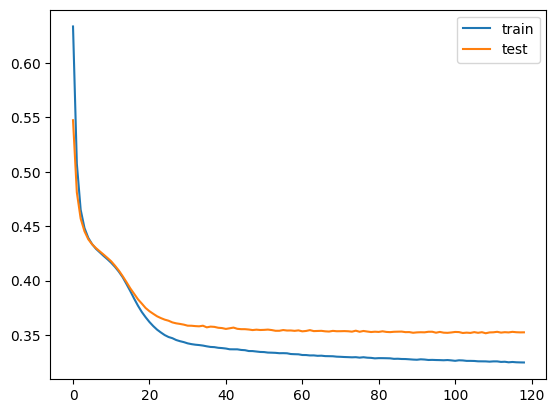

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

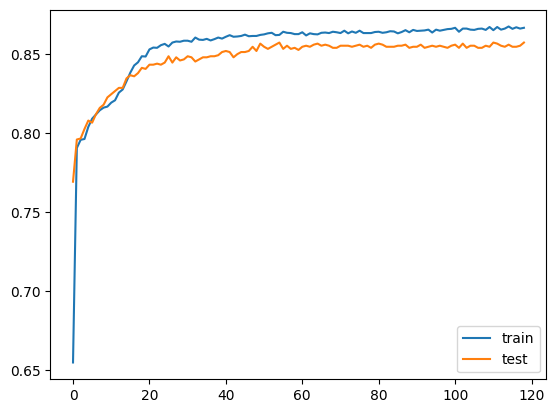

In [34]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()